<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem--metrics-for-evaluation">Definition of the Problem & Metrics for Evaluation</a></span></li>
  </ol>
  <br>

  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#naive-bayes-categorical">Naive Bayes - Categorical</a></span></li>
      <li><span style="font-weight: normal;"><a href="#naive-bayes-gaussian">Naive Bayes - Gaussian</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#knn-brute-force">KNN - Brute Force</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-kd-tree">KNN - KD Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-ball-tree">KNN - Ball Tree</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#neural-network">Neural Network</a></span></li>
    <li><span style="font-weight: normal;"><a href="#svm">Support Vector Machine</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-interpretability-and-explanability-open-ended-section">Interpretability and Explanability [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-save-model-pickle-open-ended-section">Save Model (Pickle) [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-bibliographyreferences">Bibliography/References</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [16]:
# !pip install catboost

In [17]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For treating imbalanced data
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# For modeling
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier

# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, RocCurveDisplay, DetCurveDisplay, det_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, learning_curve
from tqdm import tqdm                         # For progress bar

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

In [18]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## **🧮 Import Databases**

In [19]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

# Load the target variable after feature engineering
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet').squeeze()       # .squeeze() to convert to Series

# Check the shape of the training, validation and test data (Features - X)
print(X_train.shape, X_val.shape, test_data.shape)

# Check the shape of the training, validation and test data (Target - y)
print('\n',y_train.shape, y_val.shape)

(430519, 44) (143507, 44) (387975, 44)

 (430519,) (143507,)


In [20]:
# Display the first 2 rows of each dataset
# X_train.head(2) 

In [21]:
# test_data.head(2)

In [22]:
# y_train.head(2)

In [23]:
# Drop features based on Feature Selection [2nd Notebook]
columns_to_drop = [
    # Columns to drop based on the 2nd notebook
]

X_train = X_train.drop(columns = columns_to_drop)
X_val = X_val.drop(columns = columns_to_drop)
test_data = test_data.drop(columns = columns_to_drop)

# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, test_data.shape)

print('\n',y_train.shape, y_val.shape)

(430519, 44) (143507, 44) (387975, 44)

 (430519,) (143507,)


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

In [24]:
# Descriptive statistics of the training data after feature engineering (Ordinal Encoded)
X_train_ordinal_encoded.describe()

NameError: name 'X_train_ordinal_encoded' is not defined

> For **Modeling & Evaluation**, we will normalize the data using the **`StandardScaler`** and **`MinMaxScaler`** methods, to evaluate the best performance of the models.

In [ ]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
standard_scaler = StandardScaler().fit(X_train)
X_train_standardized = standard_scaler.transform(X_train)
X_validation_standardized = standard_scaler.transform(X_val)
X_test_standardized = standard_scaler.transform(test_data)

In [ ]:
# Min-Max Normalization
minmax_scaler = MinMaxScaler().fit(X_train)
X_train_norm = minmax_scaler.transform(X_train)
X_validation_norm = minmax_scaler.transform(X_val)
X_test_norm = minmax_scaler.transform(test_data)

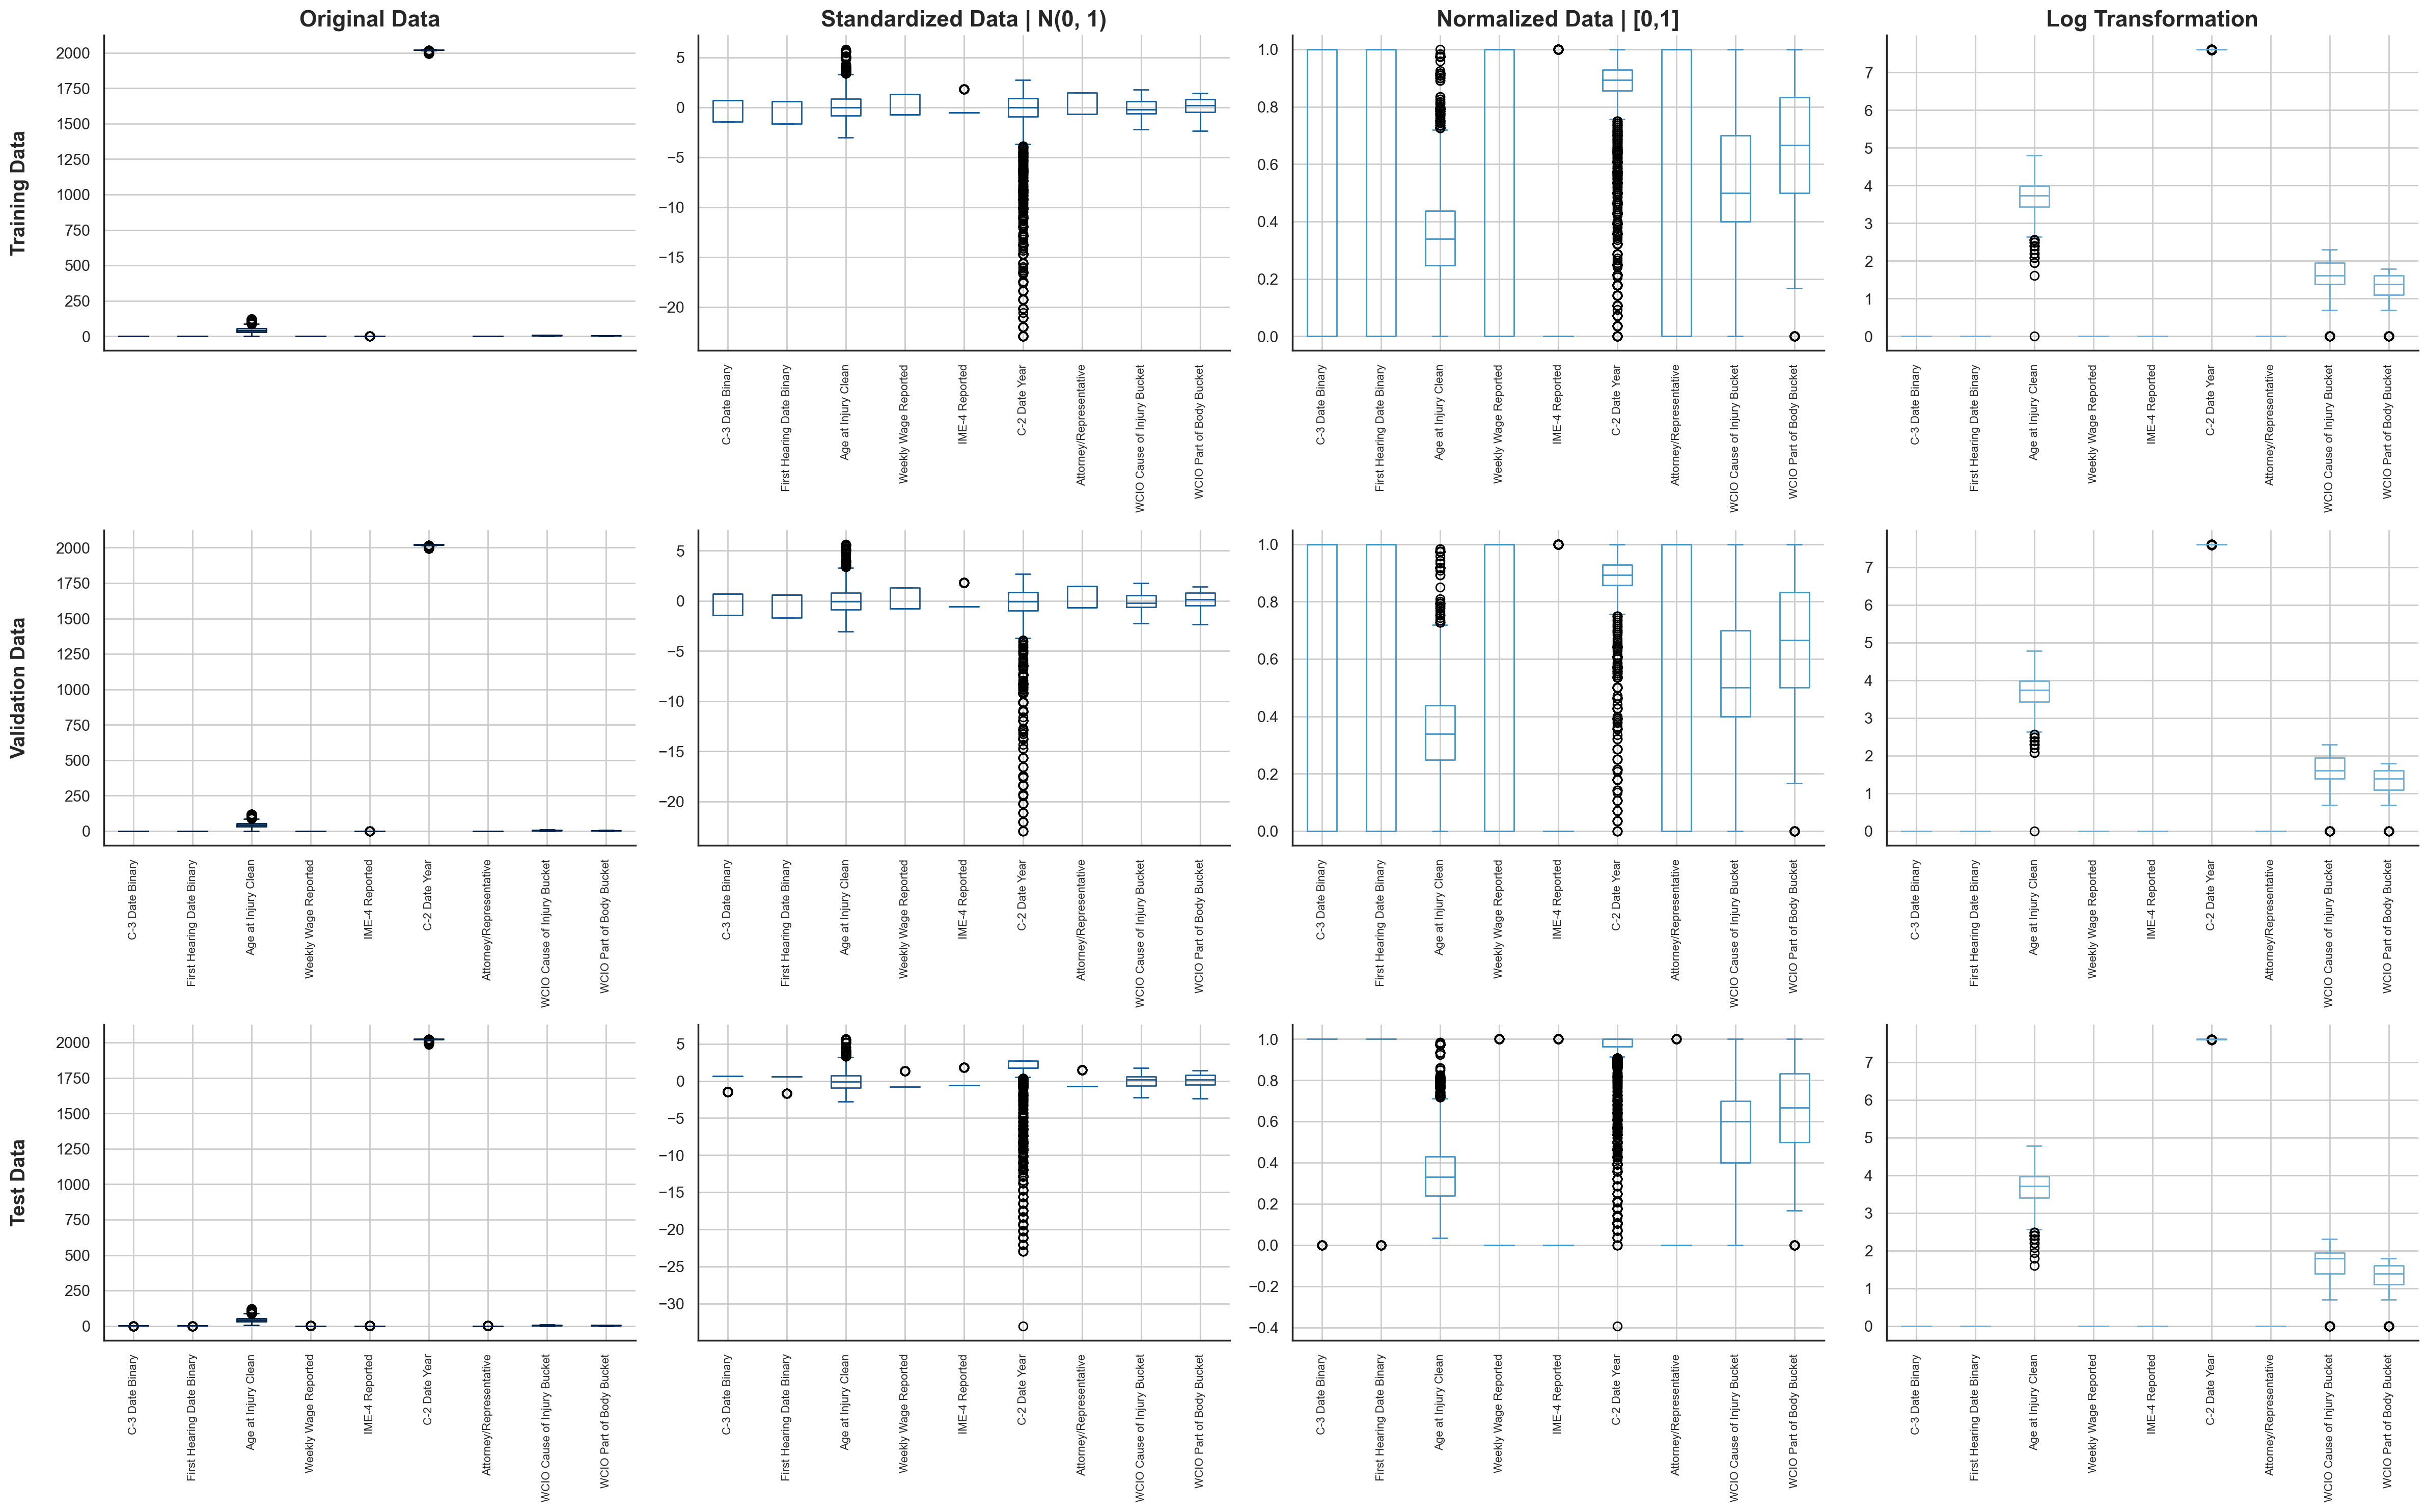

In [ ]:
# Plot Boxplots of Original Data, Standardized Data, Normalized Data, and Log Transformation for Train, Validation, and Test Sets
fig, ax = plt.subplots(3, 3, figsize=(24, 15))  # 3 rows for Train, Validation, Test and 4 columns for each transformation

# Define titles for rows
row_titles = ['Training Data', 'Validation Data', 'Test Data']

# Original Data - Train, Validation, Test
X_train.boxplot(ax=ax[0, 0], color='#002147')
X_val.boxplot(ax=ax[1, 0], color='#002147')
test_data.boxplot(ax=ax[2, 0], color='#002147')
ax[0, 0].set_title('Original Data', fontsize=16, fontweight='bold')
ax[0, 0].set_xticks([])

# Standardized Data - Train, Validation, Test
pd.DataFrame(X_train_standardized, columns=X_train.columns).boxplot(ax=ax[0, 1], color='#135C9B')
pd.DataFrame(X_validation_standardized, columns=X_train.columns).boxplot(ax=ax[1, 1], color='#135C9B')
pd.DataFrame(X_test_standardized, columns=X_train.columns).boxplot(ax=ax[2, 1], color='#135C9B')
ax[0, 1].set_title('Standardized Data | N(0, 1)', fontsize=16, fontweight='bold')

# Normalized Data - Train, Validation, Test
pd.DataFrame(X_train_norm, columns=X_train.columns).boxplot(ax=ax[0, 2], color='#4292C6')
pd.DataFrame(X_validation_norm, columns=X_train.columns).boxplot(ax=ax[1, 2], color='#4292C6')
pd.DataFrame(X_test_norm, columns=X_train.columns).boxplot(ax=ax[2, 2], color='#4292C6')
ax[0, 2].set_title('Normalized Data | [0,1]', fontsize=16, fontweight='bold')

# Adjust x-ticks rotation and y-labels
for row in range(3):
    for col in range(3):
        ax[row, col].tick_params(axis='x', rotation=90, labelsize=8)
    ax[row, 0].set_ylabel(f'{row_titles[row]}\n', fontsize=14, fontweight='bold')

# Despine and adjust layout
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Boxplots_ScalersTransformations.png', dpi=300, bbox_inches='tight')
plt.show()

---

In [ ]:
# Since OHE make categorical variables binary [0,1], we can apply the MinMaxScaler to the One-Hot encoded data
# We will mantain the same interval [0,1] for categorical variables and make the numerical variables in the same scale
minmax_scaler = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(minmax_scaler.transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_validation_norm = pd.DataFrame(minmax_scaler.transform(X_val),
                                    columns = X_val.columns,
                                    index = X_val.index)
X_test_norm = pd.DataFrame(minmax_scaler.transform(test_data),
                               columns = test_data.columns,
                               index = test_data.index)

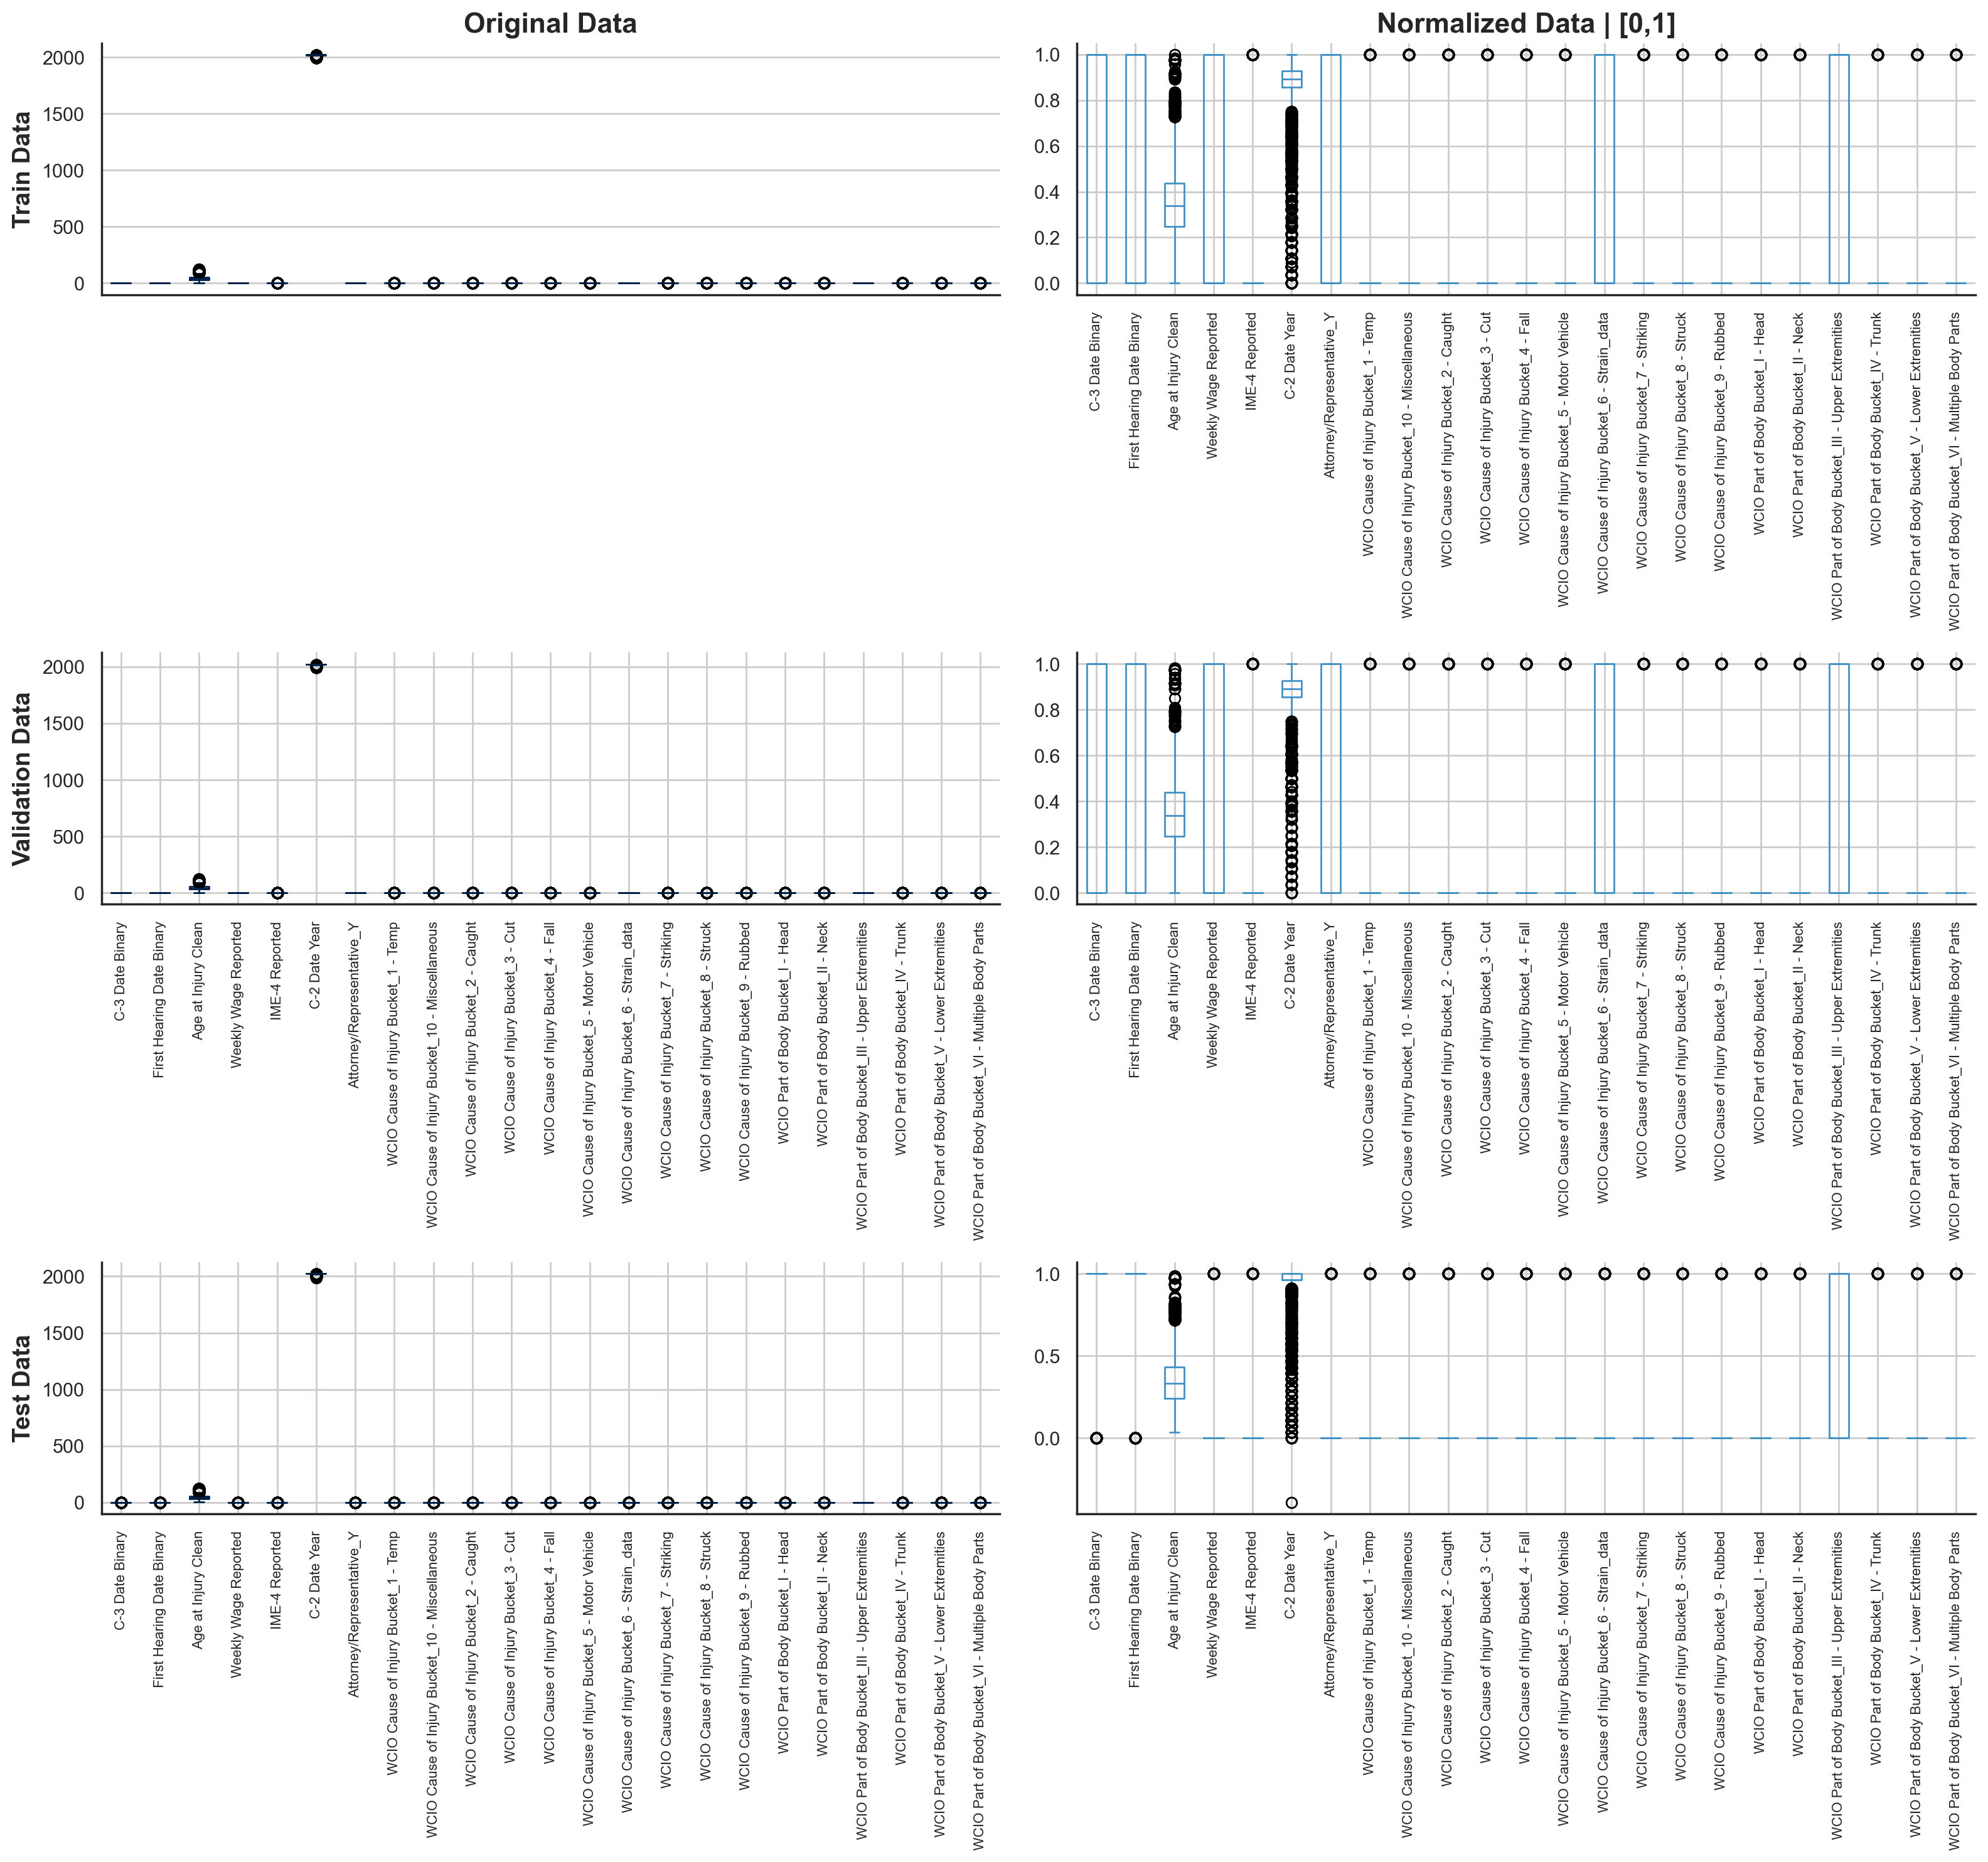

In [ ]:
# Plot Boxplots of Original OHE Data and Normalized OHE Data for Train, Validation, and Test Sets
fig, ax = plt.subplots(3, 2, figsize=(16, 15))  # 3 rows for Train, Validation, Test and 2 columns for each transformation

# Original Data - Train, Validation, Test
X_train.boxplot(ax=ax[0, 0], color='#002147')
X_val.boxplot(ax=ax[1, 0], color='#002147')
test_data.boxplot(ax=ax[2, 0], color='#002147')
ax[0, 0].set_title('Original Data', fontsize=16, fontweight='bold')
ax[0, 0].set_xticks([])
ax[0, 0].set_ylabel('Train Data', fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel('Validation Data', fontsize=14, fontweight='bold')
ax[2, 0].set_ylabel('Test Data', fontsize=14, fontweight='bold')

# Normalized Data - Train, Validation, Test
X_train_norm.boxplot(ax=ax[0, 1], color='#4292C6')
X_validation_norm.boxplot(ax=ax[1, 1], color='#4292C6')
X_test_norm.boxplot(ax=ax[2, 1], color='#4292C6')
ax[0, 1].set_title('Normalized Data | [0,1]', fontsize=16, fontweight='bold')

# Adjust x-ticks rotation and y-labels
for row in range(3):
    for col in range(2):
        ax[row, col].tick_params(axis='x', rotation=90, labelsize=8)

# Despine and adjust layout
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Boxplots_MinMaxScaler.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **🌱 Treatment of Data Imbalance** <a class='anchor' id='data-imbalance'></a>

In [ ]:
# ---------------------------------- [SMOTE] - Synthetic Minority Over-sampling Technique ----------------------------------
# Source: https://arxiv.org/abs/1106.1813
#         https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shape of the training data after applying SMOTE
print(X_train_smote.shape, y_train_smote.shape)

(1746464, 44) (1746464,)


In [41]:
# Check the distribution of the target variable after applying SMOTE
pd.DataFrame({
    'Original Data | n': y_train.value_counts(),
    'Original Data | %': y_train.value_counts(normalize=True).mul(100).round(2),
    'SMOTE Data | n': y_train_smote.value_counts(),
    'SMOTE Data | %': y_train_smote.value_counts(normalize=True).mul(100).round(2)
})

,Original Data | n,Original Data | %,SMOTE Data | n,SMOTE Data | %
Claim Injury Type,,,,
1,9358,2.17,218308,12.5
2,218308,50.71,218308,12.5
3,51679,12.00,218308,12.5
4,111380,25.87,218308,12.5
5,36210,8.41,218308,12.5
6,3158,0.73,218308,12.5
7,73,0.02,218308,12.5
8,353,0.08,218308,12.5


In [42]:
# ----------------------------- [ADASYN] - Adaptive Synthetic Sampling Approach for Imbalanced Learning -----------------------------------------------
# Source: https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf
#        https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the shape of the training data after applying ADASYN
print(X_train_adasyn.shape, y_train_adasyn.shape)

(1746830, 44) (1746830,)


In [43]:
# Check the distribution of the target variable after applying ADASYN
pd.DataFrame({
    'Original Data | n': y_train.value_counts(),
    'Original Data | %': y_train.value_counts(normalize=True).mul(100).round(2),
    'ADASYN Data | n': y_train_adasyn.value_counts(),
    'ADASYN Data | %': y_train_adasyn.value_counts(normalize=True).mul(100).round(2)
})

,Original Data | n,Original Data | %,ADASYN Data | n,ADASYN Data | %
Claim Injury Type,,,,
1,9358,2.17,221052,12.65
2,218308,50.71,218308,12.50
3,51679,12.00,222864,12.76
4,111380,25.87,214104,12.26
5,36210,8.41,214578,12.28
6,3158,0.73,219374,12.56
7,73,0.02,218343,12.50
8,353,0.08,218207,12.49


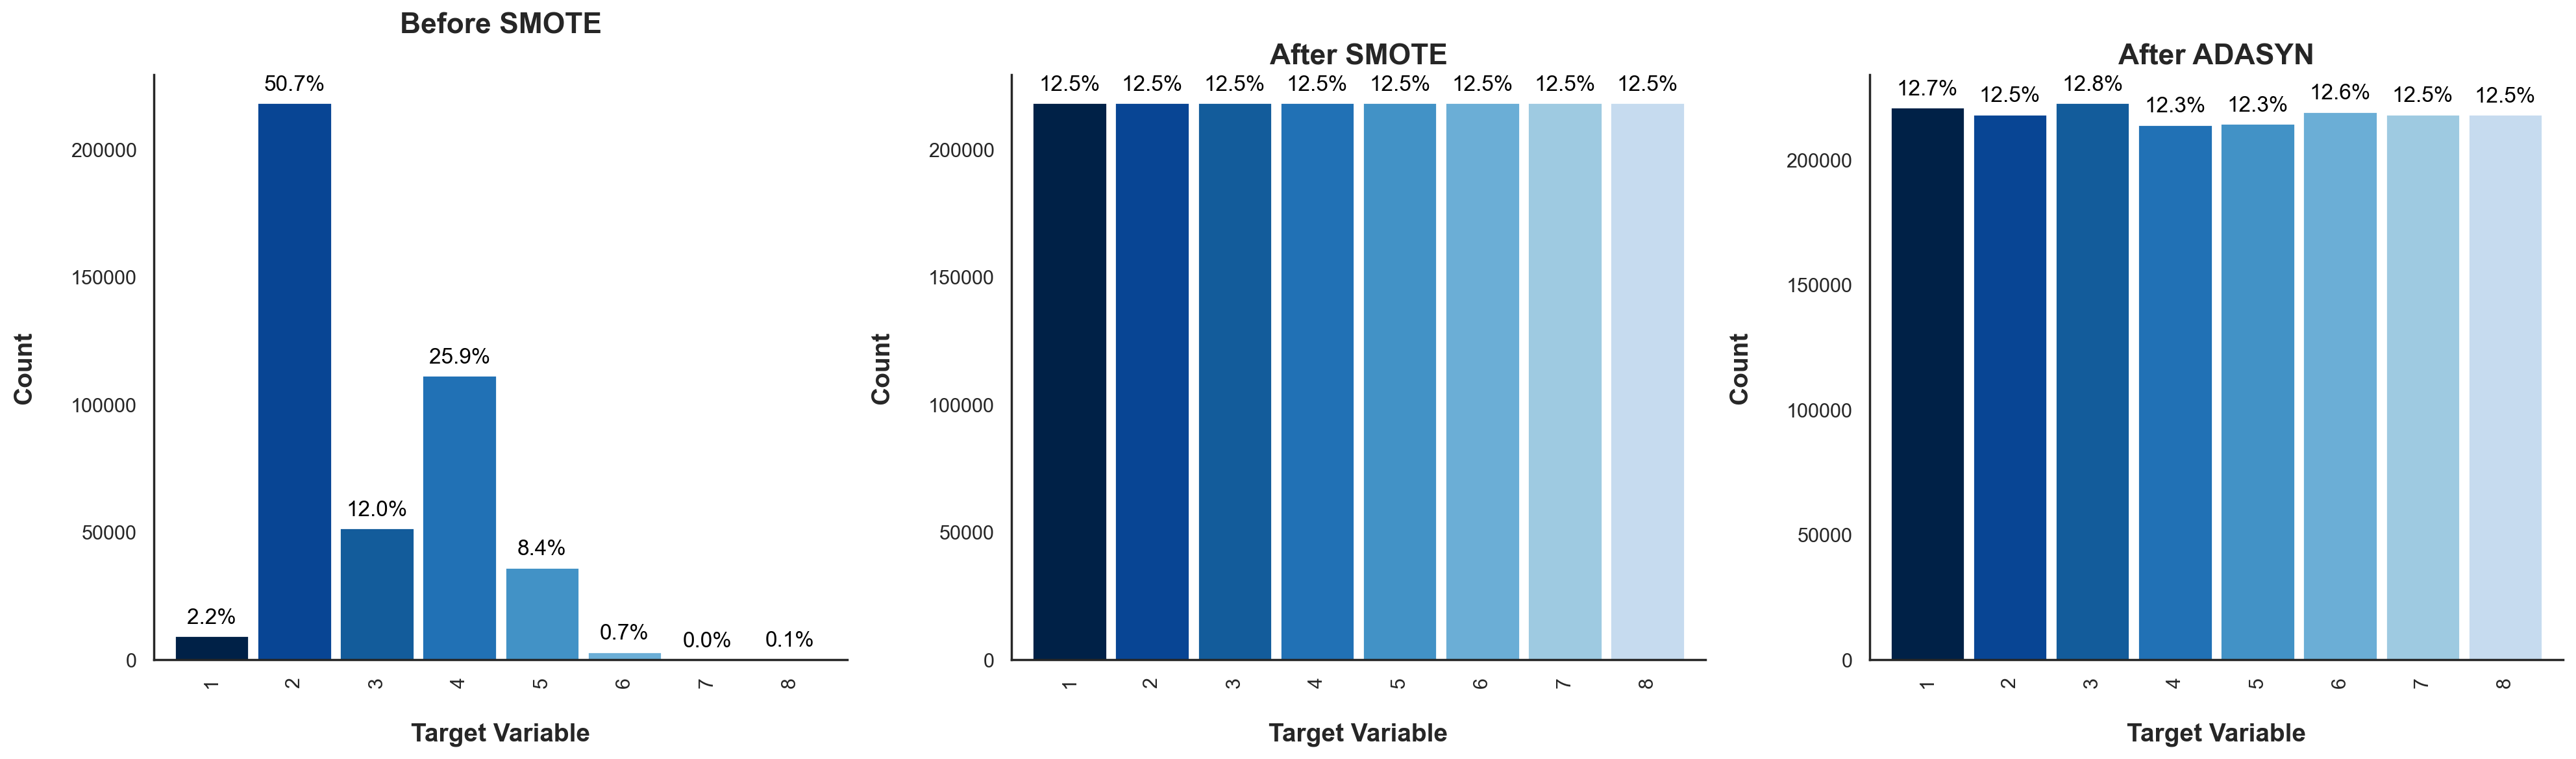

In [59]:
# Plot the distribution of the target variable before & after applying SMOTE
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Before SMOTE                                                                                  ############## NOT FINISHED ##############
palette = ['#002147', '#084594', '#135C9B', '#2171B5', '#4292C6', '#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEBF7', '#F7FBFF']

y_train.value_counts().sort_index().plot(kind='bar', ax=ax[0], color=palette[:8], width=.9)
ax[0].set_title('Before SMOTE\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count\n', fontsize=14, fontweight='bold')

# Add % labels to the bars
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()/len(y_train)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# After SMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=ax[1], color=palette[:8], width=.9)
ax[1].set_title('After SMOTE', fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Count\n', fontsize=14, fontweight='bold')

# Add % labels to the bars
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()/len(y_train_smote)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# After ADASYN
y_train_adasyn.value_counts().sort_index().plot(kind='bar', ax=ax[2], color=palette[:8], width=.9)
ax[2].set_title('After ADASYN', fontsize=16, fontweight='bold')
ax[2].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Count\n', fontsize=14, fontweight='bold')

# Add % labels to the bars
for p in ax[2].patches:
    ax[2].annotate(f'{p.get_height()/len(y_train_adasyn)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# Despine and adjust layout
sns.despine(top=True, right=True)
plt.tight_layout()
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/TargetDistribution_SMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

---

# **💡 Modeling**

### **Definition of the Problem & Metrics for Evaluation**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

<br>

> Since we have a **Classification Problem**, we will use the following metrics to evaluate the models **[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

- **Accuracy**: The proportion of *true results* among the *total number of cases* examined.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $$

- **Precision**: The proportion of *true positive* results among the *positive results predicted by the model*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

- **Recall**: The proportion of *true positive* results among the *actual positive results*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

- **F1-Score**: The harmonic mean of ***precision*** and ***recall***.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

   - **F1-Score (Macro)**: The average of the F1-Score for each class. $$ \text{F1-Score (Macro)} = \frac{1}{N} \sum_{i=1}^{N} \text{F1-Score}_i $$
   - **F1-Score (Weighted)**: The weighted average of the F1-Score for each class. $$ \text{F1-Score (Weighted)} = \frac{\sum_{i=1}^{N} \text{F1-Score}_i \times \text{Support}_i}{\sum_{i=1}^{N} \text{Support}_i} $$ <br> Where $\text{Support}_i$ is the number of occurrences of class $i$ in the dataset and $N$ is the number of classes. <br> <br> <br>
   - **F1-Score (Micro)**: The F1-Score for the entire dataset. $$ \text{F1-Score (Micro)} = \frac{\sum_{i=1}^{N} \text{TP}_i}{\sum_{i=1}^{N} \text{TP}_i + \frac{1}{2} \times \left( \sum_{i=1}^{N} \text{FP}_i + \sum_{i=1}^{N} \text{FN}_i \right)} $$ <br> Where $\text{TP}_i$, $\text{FP}_i$, and $\text{FN}_i$ are the ***True Positive***, ***False Positive***, and ***False Negative*** for class $i$, respectively. <br> <br>

- **Confusion Matrix**: A table that is often used to describe the performance of a classification model on a set of data for which the true values are known.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive (TP)**: The number of correct positive predictions.   
  - **True Negative (TN)**: The number of correct negative predictions.
  - **False Positive (FP)**: The number of incorrect positive predictions.
  - **False Negative (FN)**: The number of incorrect negative predictions.


<style>
.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
    color: #000;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
    color: #000;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

|  | Predicted: **NO** | Predicted: **YES** |
|---|---|---|
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

</div>


- **ROC Curve**: A graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive Rate (TPR)**: The proportion of actual positive cases that are correctly identified.
  - **False Positive Rate (FPR)**: The proportion of actual negative cases that are incorrectly identified as positive.
  - **AUC Score**: The area under the ROC curve.
    - **$AUC = 1$**: Perfect classifier.
    - **$AUC = 0.5$**: Random classifier.


In [ ]:
# # Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# # Additionally, it will save results in a dictionary to compare the results of different models

# models_results_train = {}
# models_results_val = {}

# def classification_metrics(model_name, cv_results,
#                            y_train, pred_train, pred_train_proba, 
#                            y_val, pred_val, pred_val_proba, classification_report_show=True):
    
#     # Display model name
#     display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

#     # Display the results of the cross-validation (KFold) - If classification_report_show=True
#     if classification_report_show:
#         # ------------------------------------- Classification Report  -------------------------------------
#         print('___________________________________________________________________________________________________________')
#         print('                                                     TRAIN                                                 ')
#         print('-----------------------------------------------------------------------------------------------------------')
#         print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
#         # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
#         print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass - OneVsRest

#         print('___________________________________________________________________________________________________________')
#         print('                                                VALIDATION                                                 ')
#         print('-----------------------------------------------------------------------------------------------------------')
#         print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
#         print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass - OneVsRest
    
#     # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

#     # Confusion Matrix for Train and Validation side by side
#     fig, ax = plt.subplots(1,2, figsize=(8,4))
#     sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
#                 annot=True, annot_kws={"size": 7}, 
#                 fmt='d', cmap='Blues', cbar=False, 
#                 xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
#     ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
#     ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
#     ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
#     ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
#     sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
#                 annot=True, annot_kws={"size": 7},
#                 fmt='d', cmap='Blues', cbar=False, 
#                 xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
#     ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
#     ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
#     ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
#     ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
#     plt.tight_layout()
#     plt.show()

#     # ----------------------------------- Save the results in a dictionary -----------------------------------
#     # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
#     models_results_train[model_name] = {
#         'Time of Execution (KFold)': str(cv_results['fit_time'].sum().round(2)) + ' +/-' + str(round(np.std(np.array(cv_results['fit_time'])), 2)),
#         'Accuracy': round(accuracy_score(y_train, pred_train), 2),
#         'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
#         'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
#         'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
#         'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)
#     }

#     models_results_val[model_name] = {
#         'Accuracy': round(accuracy_score(y_val, pred_val), 2),
#         'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
#         'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
#         'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
#         'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2)
#     }

<div class="alert alert-block alert-info" style="font-size:25px; font-weight: bold;">

[NOTE] I've just left the function above to make it easier if you need it for a test 

</div>

---

## **Classification Models**

- **Logistic Regression [LR] [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>
- **Naive Bayes[NB] [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>
  - For the Naive Bayes model, we will use two different approaches: **Categorical** and **Gaussian**.
    - **Categorical [NB_C]** <sup>[**[2.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html)</sup> <a class='anchor' id='naive-bayes-categorical'></a>: This model is used when the features are categorical.
    - **Gaussian [NB_G]** <sup>[**[2.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)</sup> <a class='anchor' id='naive-bayes-gaussian'></a>: This model is used when the features are continuous.
  - In this case, we will don't modeling with the Standardized/Normalized/Log-transformed Data, since the **Naive Bayes model doesn't require it**.
- **K-Nearest Neighbors [KNN] [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>
  - For the K-Nearest Neighbors model, our 1st approach are trying with all algorithms (**Brute Force**, **KD Tree**, and **Ball Tree**)
    - **KNN - Brute Force** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-brute-force'></a>
    - **KNN - KD Tree** <sup>[**[3.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-kd-tree'></a>
      - The KD Tree algorithm is used to reduce the time complexity of the brute-force algorithm.
      - However, the KD Tree algorithm is [**not suitable for high-dimensional data**](https://stackoverflow.com/questions/58059912/why-does-kd-tree-take-more-time-than-brute)/ [**many variables**](https://stackoverflow.com/questions/5751114/nearest-neighbors-in-high-dimensional-data).
    - **KNN - Ball Tree** <sup>[**[3.3]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-ball-tree'></a> 
  - Since **KD Tree** and **Ball Tree** take more time than **Brute Force**, we will use only the **Brute Force** algorithm for the KNN model.
- **Neural Network [NN] [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>
- **Decision Tree [DT] [<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>
- **Random Forest [RF] [<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>
- **Support Vector Machine [SVM] [<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** <a class='anchor' id='svm'></a>

<br>

- **Ensemble Models**
  - **Gradient Boosting [GBoost] [<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>
  - **Bagging [Bag] [<sup>[9]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)** <a class='anchor' id='bagging'></a>
  - **AdaBoost [Ada] [<sup>[10]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)** <a class='anchor' id='adaboost'></a>
  - **CatBoost [Cat] [<sup>[11]</sup>](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)** <a class='anchor' id='catboost'></a>
  - **Stacking [Stacking] [<sup>[12]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html)** <a class='anchor' id='stacking'></a>

In [14]:
# Function that will run a model and return the model
def run_model(model_name, X, y):
    """Run a classification model and return the trained model.

    Args:
        model_name (str): The name of the model to run.
        X (pd.DataFrame or np.ndarray): The feature matrix.
        y (pd.Series or np.ndarray): The target vector.

    Returns:
        model: The trained classification model.
    """
    ## -------------- Classification Models --------------
    
    if model_name == 'LR':
        # ------------------------------------ [Logistic Regression] ------------------------------------
        # (default parameters)
        model = LogisticRegression(random_state=2024).fit(X, y)
    if model_name == 'NB_G': 
        # ------------------------------------ [Gaussian Naive Bayes] ------------------------------------
        # var_smoothing=0.0001 to avoid errors when the variance is zero
        model = GaussianNB(var_smoothing=0.0001, random_state=2024).fit(X, y)
    if model_name == 'NB_C':
        # ----------------------------------- [Categorical Naive Bayes] ----------------------------------
        # (default parameters)
        model = CategoricalNB(random_state=2024).fit(X, y)
    if model_name == 'KNN':
        # ------------------------------------ [K-Nearest Neighbors] ------------------------------------
        # Based on previous analysis, we will use algorithm='auto' to let the model decide the best algorithm
        #                                         n_neighbors = 12, p = 2 (Euclidean Distance), weights = 'uniform' (Avoids overfitting)        
        model = KNeighborsClassifier(algorithm='auto', n_neighbors=12, p=2, weights='uniform').fit(X, y)
    if model_name == 'NN':
        # --------------------------- [Neural Network | Multi-Layer Perceptron] -------------------------
        # alpha=0.01                 -> L2 penalty (regularization term) parameter
        # hidden_layer_sizes = (20,20) -> 2 hidden layers with 5 neurons each
        # activation = 'tanh'        -> Hyperbolic tangent activation function
        # solver = 'adam'            -> Stochastic Gradient Descent
        # learning_rate = 'adaptive' -> Keeps the learning rate constant
        model = MLPClassifier(alpha=0.01, hidden_layer_sizes = (20,20), activation = 'tanh', solver = 'adam', learning_rate = 'adaptive', 
                              verbose = 0, learning_rate_init = 0.02, batch_size = 1000, max_iter = 1000, random_state=2024).fit(X, y)                    ########### CHOSE PARAMETERS
    if model_name == 'DT':
        # ------------------------------------ [Decision Tree] ------------------------------------
        # criterion='entropy'        -> Information Gain
        # max_depth = 20             -> Maximum depth of the tree
        # min_samples_split= 10      -> Minimum number of samples required to split an internal node
        model = DecisionTreeClassifier(criterion='entropy', max_depth = 20, min_samples_split= 10, random_state=2024).fit(X, y)
    if model_name == 'SVM':
        # ---------------------------- [SVM | Support Vector Machine] ------------------------------
        # C=0.05                     -> Regularization parameter
        # degree=2                   -> Degree of the polynomial kernel function
        # gamma='scale'              -> Kernel coefficient
        # kernel='rbf'               -> Radial Basis Function
        model = SVC(C=0.05, degree=2, gamma='scale', kernel='rbf', random_state=2024).fit(X, y)
    
    ## -------------- Ensemble Models --------------
    if model_name == 'RF':
        # ------------------------------------ [Random Forest] ------------------------------------
        # max_depth = 20             -> Maximum depth of the tree
        # n_estimators=1000          -> Number of trees in the forest
        # min_samples_leaf = 10      -> Minimum number of samples required to be at a leaf node
        model = RandomForestClassifier(max_depth = 20, n_estimators=1000, min_samples_leaf = 10, random_state=2024).fit(X, y)
    if model_name == 'GBoost':
        # ------------------------------------ [Gradient Boosting] ------------------------------------
        model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, random_state=2024).fit(X, y)
    if model_name == 'Bag':
        # ------------------------------------ [Bagging] ------------------------------------
        model = BaggingClassifier(random_state=2024).fit(X, y)
    if model_name == 'Ada':
        # ------------------------------------ [AdaBoost] ------------------------------------
        model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.8, random_state=2024).fit(X, y)
    if model_name == 'Cat':
        # ------------------------------------ [CatBoost] ------------------------------------
        model = CatBoostClassifier(random_state=2024).fit(X, y)
    if model_name == 'Stacking':
        # ------------------------------------ [Stacking] ------------------------------------
        estimators = [
            ('rf', RandomForestClassifier(random_state=2024)),
            ('svr', SVC(random_state=2024))
        ]
        model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), random_state=2024).fit(X, y)
    
    return model

In [ ]:
# Function to calculate averages scores of each run in each iteration of K-fold Cross Validation
def avg_score(cv_method,X,y, model_name):
    
    accuracy_train = []
    accuracy_val = [] 
    precision_train = []
    precision_val = []
    recall_train = []
    recall_val = []
    f1macro_train = []
    f1macro_val = []
    auc_train = []
    auc_val = []
    timer = []
    confusion_matrixs = []
    averaged_confusion_matrix=None
    
    for train_index, val_index in cv_method.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        begin = time.perf_counter()
        model = run_model(model_name, X_train, y_train)
        end = time.perf_counter()
        
        labels_train = model.predict(X_train)
        labels_val = model.predict(X_val)
        
        f1macro_train.append(metrics.f1_score(y_train, labels_train, average='macro'))
        f1macro_val.append(metrics.f1_score(y_val, labels_val, average='macro'))
        
        precision_train.append(metrics.precision_score(y_train, labels_train))
        precision_val.append(metrics.precision_score(y_val, labels_val))
        
        recall_train.append(metrics.recall_score(y_train, labels_train))
        recall_val.append(metrics.recall_score(y_val, labels_val))
        
        timer.append(end-begin)
        
        if model_name == 'GBoost':
            confusion_matrixs.append(confusion_matrix(y_val, labels_val))
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_f1_train = round(np.mean(f1macro_train),3)
    avg_f1_val = round(np.mean(f1macro_val),3)
    avg_f1_test = round(np.mean(f1macro_test),3)
    avg_precision_train = round(np.mean(precision_train),3)
    avg_precision_val = round(np.mean(precision_val),3)
    avg_precision_test = round(precision_test,3)
    avg_recall_train = round(np.mean(recall_train),3)
    avg_recall_val = round(np.mean(recall_val),3)
    avg_recall_test = round(recall_test,3)
    
    std_time = round(np.std(timer),3)
    std_f1_train = round(np.std(f1macro_train),3)
    std_f1_val = round(np.std(f1macro_test),3)
    std_precision_train = round(np.std(precision_train),3)
    std_precision_val = round(np.std(precision_val),3)
    std_recall_train = round(np.std(recall_train),3)
    std_recall_val = round(np.std(recall_val),3)
            
    return str(avg_time) + '+/-' + str(std_time), \
           str(avg_f1_train) + '+/-' + str(std_f1_train), \
           str(avg_f1_val) + '+/-' + str(std_f1_val), \
           str(avg_precision_train) + '+/-' + str(std_precision_train), \
           str(avg_precision_val) + '+/-' + str(std_precision_val), \
           str(avg_recall_train) + '+/-' + str(std_recall_train), \
           str(avg_recall_val) + '+/-' + str(std_recall_val), \
           str(avg_recall_test), confusion_matrixs

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

In [15]:
# # Save the results in a Excel file
# df_results_train.index.name = 'Model'
# df_results_val.index.name = 'Model'

# df_results_train.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_11.11.2024.xlsx',          ################# Change the day
#                           sheet_name='Train_AndreSilvestre')                                                    ################# Change the name of the sheet
# df_results_val.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/Models_Results_11.11.2024.xlsx',            ################# Change the day
#                         sheet_name='Validation_AndreSilvestre')                                                 ################# Change the name of the sheet

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

In [16]:
# [Need to be finished]...............................................

# # AUC-ROC Curve
# # Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_det.html#plot-roc-and-det-curves adapted with AI
# #         https://www.kaggle.com/discussions/general/343302
# #         https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# # Setting up the multi-class classifier for best_model (OneVsRestClassifier)
# ovr_classifier = OneVsRestClassifier(knn_ohe_bestmodel, n_jobs=-1, verbose=1)
# ovr_classifier.fit(X_train_ohe_norm, y_train)
# pred_train = ovr_classifier.predict(X_train_ohe_norm)
# pred_val = ovr_classifier.predict(X_validation_ohe_norm)
# pred_train_proba = ovr_classifier.predict_proba(X_train_ohe_norm)
# pred_val_proba = ovr_classifier.predict_proba(X_validation_ohe_norm)


# # ------------------------------------ AUC-ROC Curve ------------------------------------
# fig, [ax_roc_train, ax_roc_val] = plt.subplots(1, 2, figsize=(11, 5))

# n_classes = y_train.nunique()

# # ROC curve for each class [Train Data]
# fpr_train = {}
# tpr_train = {}
# thresh_train = {}

# # Calculate ROC curve for each class [Train Data]
# for i in range(n_classes):    
#     fpr_train[i], tpr_train[i], thresh_train[i] = roc_curve(y_true=y_train ,                     # y_true -> True labels
#                                                             y_score=pred_train_proba[:,i],       # y_score -> Target scores
#                                                             pos_label=i)                         # pos_label -> The label of the positive class
#     print(f'Class {i} -> AUC: {roc_auc_score(y_train, pred_train_proba[:,i])}')

# # ROC curve for each class [Validation Data]
# fpr_val = {}
# tpr_val = {}
# thresh_val = {}

# # Calculate ROC curve for each class [Validation Data]
# for i in range(n_classes):    
#     fpr_val[i], tpr_val[i], thresh_val[i] = roc_curve(y_val, pred_val_proba[:,i], pos_label=i)
#     print(f'Class {i} -> AUC: {roc_auc_score(y_val, pred_val_proba[:,i])}')

# # ROC curve for each class [Train Data]
# ax_roc_train.plot([0, 1], [0, 1], 'k--')
# for i in range(n_classes):
#     ax_roc_train.plot(fpr_train[i], tpr_train[i], label='Class {}'.format(i))

# # ROC curve for each class [Validation Data]
# ax_roc_val.plot([0, 1], [0, 1], 'k--')
# for i in range(n_classes):
#     ax_roc_val.plot(fpr_val[i], tpr_val[i], label='Class {}'.format(i), linestyle='--')

# # Customize the plot
# ax_roc_train.set_title('ROC Curve [Train Data]', fontsize=12, fontweight='bold')
# ax_roc_train.set_xlabel('False Positive Rate', fontsize=8, fontweight='bold')
# ax_roc_train.set_ylabel('True Positive Rate', fontsize=8, fontweight='bold')
# ax_roc_train.legend(title='Class', loc='best', fontsize=7, title_fontproperties={'weight': 'bold', 'size': '10'}, frameon=False)
# ax_roc_train.grid()

# ax_roc_val.set_title('ROC Curve [Validation Data]', fontsize=12, fontweight='bold')
# ax_roc_val.set_xlabel('False Positive Rate', fontsize=8, fontweight='bold')
# ax_roc_val.set_ylabel('True Positive Rate', fontsize=8, fontweight='bold')
# ax_roc_val.legend(title='Class', loc='best', fontsize=7, title_fontproperties={'weight': 'bold', 'size': '10'}, frameon=False)
# ax_roc_val.grid()

# sns.despine(right=True, top=True)
# plt.tight_layout()
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/AUC_ROC_DET_Curves_11.11.2024.png', dpi=300, bbox_inches='tight')
# plt.show()

In [17]:
# [To be continued...]

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

In [2]:
# Optimizing the hyperparameters of the best model
# ------------------------------------------- [Grid Search Cross Validation] -------------------------------------------
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Hyperparameters to be optimized

# # Grid Search w/ Cross Validation
# grid_search = GridSearchCV(bestmodel,       # Model
#                            param_grid,              # Hyperparameters
#                            cv=3,                    # Cross-Validation with 3 folds                         
#                            scoring='f1_macro',      # Metric to optimize
#                            # n_jobs=-1,               # Use all processors (parallelize the execution -> possible to be faster)
#                            #                          For some reason, the parallelization is not working properly for Windows PC
#                            return_train_score=True, # Return the training score
#                            verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
#                                                     #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)

# # Train the GridSearchCV
# grid_search.fit(X_train_ohe_norm, y_train)

# # Best hyperparameters
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# best_estimator = grid_search.best_estimator_

# print('Best Hyperparameters:\n', best_params)
# print('Best Score:\n', best_score)
# print('Best Estimator:\n', best_estimator)

# ## Time of Execution Grid Search Cross Validation = 342m 56s ~5h 43m

In [3]:
# # Save the optimization results in a Excel file
# df_results = pd.DataFrame(grid_search.cv_results_)
# df_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_Results_11.11.2024.xlsx')                ################# Change the day

In [4]:
# # Plot the results of the Grid Search
# # Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv

# # All results of the Grid Search
# grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
# grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
# for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

In [5]:
# # Preparing data for plotting
# p_values = [1, 2]
# accuracy_means_p1 = grid_mean_scores_means[::2]
# accuracy_means_p2 = grid_mean_scores_means[1::2]

# # Plot the results of the Grid Search - Best K
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, accuracy_means_p1, label=rf"$\mathbf{{p=1}}$ (Manhattan Distance)", color='#2171B5', marker='o', markersize=5)
# plt.plot(k_range, accuracy_means_p2, label=rf"$\mathbf{{p=2}}$ (Euclidean Distance)", color='#4292C6', marker='s', markersize=5)

# # Adding labels and title
# plt.xlabel('\nValue of K for KNN', fontsize=12, fontweight='bold')
# plt.ylabel('Cross-Validated | F1 Score (Macro)\n', fontsize=12, fontweight='bold')
# plt.title('Grid Search Cross-Validation Results | Best K\n', fontsize=16, fontweight='bold')

# # Customizing the plot
# plt.legend(title="Distance Metric", loc='center right', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)
# plt.xticks(k_range)

# sns.despine(right=True, top=True)
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_K_11.11.2024.png', dpi=200, bbox_inches='tight')
# plt.show()

In [6]:
# # Best model with the best hyperparameters
# best_knn_ohe_GSCV = KNeighborsClassifier(**best_params)
# best_knn_ohe_GSCV_cv = cross_validate(best_knn_ohe_GSCV, X_train_ohe_norm, y_train, cv=10)

# # Train the model
# best_knn_ohe_GSCV.fit(X_train_ohe_norm, y_train)

# # Predictions
# best_knn_ohe_GSCV_pred_train = best_knn_ohe_GSCV.predict(X_train_ohe_norm)
# best_knn_ohe_GSCV_pred_train_proba = best_knn_ohe_GSCV.predict_proba(X_train_ohe_norm)

# best_knn_ohe_GSCV_pred_val = best_knn_ohe_GSCV.predict(X_validation_ohe_norm)
# best_knn_ohe_GSCV_pred_val_proba = best_knn_ohe_GSCV.predict_proba(X_validation_ohe_norm)

# ## Time of Execution KNN (Best Model with Grid Search Cross-Validation) = 7m 19s

In [7]:
# # Classification Metrics & Confusion Matrix for 'distance' model
# classification_metrics(
#     'K-Nearest Neighbors | One-Hot Encoding (Optimized, Distance Weights)', best_knn_distance_cv, 
#     y_train, best_knn_distance_pred_train, best_knn_distance_pred_train_proba, 
#     y_val, best_knn_distance_pred_val, best_knn_distance_pred_val_proba, classification_report_show=True)

# # Dataframe with the results of the models
# df_results_train = pd.DataFrame(models_results_train).T
# df_results_val = pd.DataFrame(models_results_val).T

# # Display the results
# display_side_by_side(df_results_train, df_results_val,
#                      titles=['Training Set', 'Validation Set'],
#                      super_title='Results of the Best Model with Grid Search Cross-Validation (Distance Weights)')

In [46]:
# ROC Curve
# [To be continued...]

---

### 📊 **Feature Importance**

In [ ]:
# [To be continued...]

---

## 🔮 **Test Data Prediction**

In [ ]:
# Best Model
best_model = best_knn_distance

# Fit best model with the whole data -> Train + Validation (Try to improve the model performance on the test data)
best_model.fit(pd.concat([X_train_ohe_norm, X_validation_ohe_norm]), pd.concat([y_train, y_val]))

# Predictions on the test_data
pred_test_ohe = best_model.predict(X_test_ohe_norm)

## Time of Execution KNN (Best Model with GridSearch CS - Fit with Train+Validation & Test Data) = 2m 20s

In [52]:
# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data.reset_index()['Claim Identifier'], 'Claim Injury Type': pred_test_ohe})
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
submission_data

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,1. CANCELLED
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,1. CANCELLED


---

## 📋 **CSV Export - Submission**

In [53]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')    # 11.11.2024
# submission_data.to_csv('submissions/Group33_Version02.csv', index=False, header=True, sep=',')

---

# **🏁 Interpretability and Explanability** [Open Ended-Section]

In [60]:
# from lime import lime_tabular

# [To be continued...]

---

# **🔵 Save Model (Pickle)** [Open Ended-Section]

In [61]:
# Source: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# import pickle

# # Save the model to disk -> For use in Web Application (Open-Ended Section)
# filename = '../[ML]_WebApp_Group33/BestModel_11.11.2024.sav'
# pickle.dump(best_model, open(filename, 'wb'))

# [To be continued...]

---

# **🔗 Bibliography/References**

**[[0]](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** Kelleher, J. D., Brian Mac Namee, & Aoife D'arcy. (2015). Fundamentals of machine learning for predictive data analytics : algorithms, worked examples, and case studies (pp. 460–480). The Mit Press.

**[[1]](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2022), "Logistic Regression." https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[2]](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** Scikit-Learn. (2022), "Naive Bayes." https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html

**[[3]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** Scikit-Learn. (2022), "K-Nearest Neighbors." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**[[4]](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** Scikit-Learn. (2022), "Neural Network." https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html

**[[5]](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** Scikit-Learn. (2022), "Decision Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**[[6]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** Scikit-Learn. (2022), "Random Forest." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**[[7]](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** Scikit-Learn. (2022), "Support Vector Machine (SVM)." https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html

**[[8]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** Scikit-Learn. (2022), "Gradient Boosting." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

---